In [2]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [3]:
nyc_data_path = 'nyc_data_numeric.csv'
grid_data_path = 'grid_data_updated.csv'
geoinfo_path = 'NYC_GEOINFO2023.GEOINFO-Data.csv'

In [4]:
nyc_data = pd.read_csv(nyc_data_path)
grid_data = pd.read_csv(grid_data_path)
geoinfo = pd.read_csv(geoinfo_path)

In [5]:
# Clean the GEOINFO data by removing the first row with descriptions
geoinfo_cleaned = geoinfo.iloc[1:].copy()  # Skip the header row

In [6]:
# Convert latitude and longitude columns to floats
geoinfo_cleaned['INTPTLAT'] = pd.to_numeric(geoinfo_cleaned['INTPTLAT'], errors='coerce')
geoinfo_cleaned['INTPTLON'] = pd.to_numeric(geoinfo_cleaned['INTPTLON'], errors='coerce')

In [7]:
geoinfo_cleaned = geoinfo_cleaned.drop('Unnamed: 8', axis=1)

In [8]:
# Function to map census tracts to grid IDs
def map_tract_to_grid(row, grid_df):
    lat, lon = row['INTPTLAT'], row['INTPTLON']
    match = grid_df[(grid_df['Min Lat'] <= lat) & (grid_df['Max Lat'] >= lat) &
                    (grid_df['Min Long'] <= lon) & (grid_df['Max Long'] >= lon)]
    if not match.empty:
        return match.iloc[0]['Grid ID']
    return None

In [9]:
# Map the GEOINFO data to grid IDs
geoinfo_cleaned['Grid ID'] = geoinfo_cleaned.apply(lambda row: map_tract_to_grid(row, grid_data), axis=1)

In [10]:
# Merge the mapped data with the original NYC data
nyc_data['GEO_ID'] = nyc_data['Geography'].astype(str)
merged_data = pd.merge(nyc_data, geoinfo_cleaned, on='GEO_ID', how='left')
merged_data = pd.merge(merged_data, grid_data, on='Grid ID', how='left')

In [11]:
# Remove redundant or unwanted columns
cleaned_data = merged_data.drop(['GEO_ID', 'Unnamed: 0'], axis=1, errors='ignore')

In [12]:
cleaned_data = cleaned_data.drop(['INTPTLAT', 'INTPTLON', 'Min Lat', 'Max Lat', 'Min Long', 'Max Long', 'Grid ID', 'NAME', 'Geography_name', 'Geography'], axis=1).dropna().reset_index().drop('index', axis=1)

In [13]:
cleaned_data.head()

,total_population,population_density,male_percent,percent_inhouseholds,percent_marriedhouseholds,percent_cohabitingcouple,percent_solomale,percent_solofemale,percent_occupiedhousingunits,percent_owneroccupied,...,under25y_percent_bachelors,over25y_percent_highschool,over25y_percent_somecollege,over25y_percent_bachelors,over25y_percent_graduatedegree,AREALAND,AREAWATR,AREALAND_SQMI,AREAWATR_SQMI,Ride Count
0,4779,27624.277457,0.476878,0.998326,0.112994,0.022808,0.033271,0.030550,0.951694,0.466123,...,0.000,0.262,0.196,0.150,0.194,448105,852406,0.173,0.329,0.0
1,6272,20976.588629,0.473374,0.997768,0.129624,0.024872,0.030134,0.035714,0.959091,0.572727,...,0.179,0.220,0.327,0.161,0.128,775416,690794,0.299,0.267,0.0
2,5795,30989.304813,0.433650,0.960311,0.090250,0.019845,0.033477,0.071268,0.959136,0.147957,...,0.083,0.288,0.298,0.131,0.035,485078,0,0.187,0.000,0.0
3,2292,29012.658228,0.503927,0.985166,0.078970,0.055410,0.105148,0.061518,0.941849,0.004766,...,0.138,0.199,0.296,0.218,0.126,205007,0,0.079,0.000,0.0
4,1613,8911.602210,0.537508,0.647861,0.055797,0.021699,0.092374,0.050217,0.925430,0.118547,...,0.176,0.322,0.157,0.143,0.028,469741,0,0.181,0.000,0.0


In [14]:
cleaned_data = cleaned_data[cleaned_data['Ride Count'] != 0]

In [15]:
cleaned_data

,total_population,population_density,male_percent,percent_inhouseholds,percent_marriedhouseholds,percent_cohabitingcouple,percent_solomale,percent_solofemale,percent_occupiedhousingunits,percent_owneroccupied,...,under25y_percent_bachelors,over25y_percent_highschool,over25y_percent_somecollege,over25y_percent_bachelors,over25y_percent_graduatedegree,AREALAND,AREAWATR,AREALAND_SQMI,AREAWATR_SQMI,Ride Count
134,5669,125977.777778,0.473981,0.956783,0.080437,0.023461,0.030517,0.044099,0.977814,0.041667,...,0.140,0.304,0.200,0.107,0.060,117193,0,0.045,0.000,2.0
141,1464,32533.333333,0.525273,0.890027,0.081284,0.015710,0.036885,0.032787,0.972727,0.036364,...,0.042,0.305,0.162,0.099,0.000,117143,0,0.045,0.000,2.0
143,4577,99500.000000,0.483723,0.932489,0.081276,0.022067,0.045663,0.039109,0.961215,0.027796,...,0.000,0.312,0.254,0.110,0.041,119112,0,0.046,0.000,5.0
144,3574,148916.666667,0.495243,0.979575,0.078903,0.022943,0.029099,0.031337,0.965858,0.036837,...,0.015,0.239,0.325,0.076,0.014,62577,0,0.024,0.000,2.0
145,3570,137307.692308,0.456583,0.996078,0.089636,0.022129,0.030812,0.040896,0.972477,0.008340,...,0.059,0.373,0.210,0.023,0.011,68200,0,0.026,0.000,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,3966,43108.695652,0.496974,1.000000,0.125315,0.027736,0.038830,0.038830,0.944253,0.176875,...,0.378,0.201,0.302,0.227,0.142,238756,0,0.092,0.000,145.0
1341,4128,62545.454545,0.492248,0.993702,0.142442,0.031734,0.039002,0.053779,0.915060,0.214458,...,0.149,0.227,0.272,0.322,0.112,171163,0,0.066,0.000,85.0
1343,4308,67312.500000,0.491876,0.999304,0.131616,0.044104,0.044104,0.045497,0.938453,0.083236,...,0.237,0.316,0.232,0.237,0.133,165272,0,0.064,0.000,12.0
1344,5226,67000.000000,0.495599,1.000000,0.134902,0.041332,0.044393,0.047072,0.927212,0.137012,...,0.259,0.302,0.246,0.177,0.103,202060,0,0.078,0.000,121.0


In [16]:
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy.stats import norm

In [17]:
import numpy as np

In [18]:
features = cleaned_data.copy()

In [19]:
features.dtypes

total_population               int64
population_density           float64
male_percent                 float64
percent_inhouseholds         float64
percent_marriedhouseholds    float64
                              ...   
AREALAND                      object
AREAWATR                      object
AREALAND_SQMI                 object
AREAWATR_SQMI                 object
Ride Count                   float64
Length: 94, dtype: object

In [20]:
features

,total_population,population_density,male_percent,percent_inhouseholds,percent_marriedhouseholds,percent_cohabitingcouple,percent_solomale,percent_solofemale,percent_occupiedhousingunits,percent_owneroccupied,...,under25y_percent_bachelors,over25y_percent_highschool,over25y_percent_somecollege,over25y_percent_bachelors,over25y_percent_graduatedegree,AREALAND,AREAWATR,AREALAND_SQMI,AREAWATR_SQMI,Ride Count
134,5669,125977.777778,0.473981,0.956783,0.080437,0.023461,0.030517,0.044099,0.977814,0.041667,...,0.140,0.304,0.200,0.107,0.060,117193,0,0.045,0.000,2.0
141,1464,32533.333333,0.525273,0.890027,0.081284,0.015710,0.036885,0.032787,0.972727,0.036364,...,0.042,0.305,0.162,0.099,0.000,117143,0,0.045,0.000,2.0
143,4577,99500.000000,0.483723,0.932489,0.081276,0.022067,0.045663,0.039109,0.961215,0.027796,...,0.000,0.312,0.254,0.110,0.041,119112,0,0.046,0.000,5.0
144,3574,148916.666667,0.495243,0.979575,0.078903,0.022943,0.029099,0.031337,0.965858,0.036837,...,0.015,0.239,0.325,0.076,0.014,62577,0,0.024,0.000,2.0
145,3570,137307.692308,0.456583,0.996078,0.089636,0.022129,0.030812,0.040896,0.972477,0.008340,...,0.059,0.373,0.210,0.023,0.011,68200,0,0.026,0.000,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,3966,43108.695652,0.496974,1.000000,0.125315,0.027736,0.038830,0.038830,0.944253,0.176875,...,0.378,0.201,0.302,0.227,0.142,238756,0,0.092,0.000,145.0
1341,4128,62545.454545,0.492248,0.993702,0.142442,0.031734,0.039002,0.053779,0.915060,0.214458,...,0.149,0.227,0.272,0.322,0.112,171163,0,0.066,0.000,85.0
1343,4308,67312.500000,0.491876,0.999304,0.131616,0.044104,0.044104,0.045497,0.938453,0.083236,...,0.237,0.316,0.232,0.237,0.133,165272,0,0.064,0.000,12.0
1344,5226,67000.000000,0.495599,1.000000,0.134902,0.041332,0.044393,0.047072,0.927212,0.137012,...,0.259,0.302,0.246,0.177,0.103,202060,0,0.078,0.000,121.0


In [21]:
features['AREALAND'] = features['AREALAND'].astype(np.float64)
features['AREAWATR'] = features['AREAWATR'].astype(np.float64)
features['AREALAND_SQMI'] = features['AREALAND_SQMI'].astype(np.float64)
features['AREAWATR_SQMI'] = features['AREAWATR_SQMI'].astype(np.float64)

In [22]:
def calc_zscore_helper(ds, dropoutliers):
    percrank = np.ceil(ds.rank(ascending=False)/(ds.count()) * 100)
    zscore = (norm.ppf(1- percrank/100 + dropoutliers).round(4))

    return zscore

In [23]:
features.transform(lambda x: calc_zscore_helper(x, 0.005), axis=0)

,total_population,population_density,male_percent,percent_inhouseholds,percent_marriedhouseholds,percent_cohabitingcouple,percent_solomale,percent_solofemale,percent_occupiedhousingunits,percent_owneroccupied,...,under25y_percent_bachelors,over25y_percent_highschool,over25y_percent_somecollege,over25y_percent_bachelors,over25y_percent_graduatedegree,AREALAND,AREAWATR,AREALAND_SQMI,AREAWATR_SQMI,Ride Count
134,0.6903,1.1031,-0.1383,-0.6903,-0.9741,-1.0581,-1.9600,-1.2536,1.9600,-1.1031,...,-0.8239,1.3106,0.7225,-1.3106,-1.1503,-0.7892,-0.0878,-0.8239,-0.0878,-1.9600
141,-1.9600,-1.4395,1.5982,-1.2536,-0.8965,-1.6954,-1.5141,-1.9600,1.8119,-1.2004,...,-1.4395,1.3722,0.3451,-1.3722,-2.5758,-0.8239,-0.0878,-0.8239,-0.0878,-1.9600
143,0.2663,0.5681,0.2663,-0.9741,-0.8965,-1.2004,-1.0152,-1.5141,1.3722,-1.4395,...,-1.9600,1.4395,1.2536,-1.3106,-1.3722,-0.7892,-0.0878,-0.7892,-0.0878,-1.5982
144,-0.4538,1.4395,0.5978,-0.3451,-1.0152,-1.1031,-2.1701,-2.5758,1.5141,-1.2004,...,-1.5982,0.6588,2.1701,-1.6954,-1.9600,-1.6954,-0.0878,-1.6954,-0.0878,-1.9600
145,-0.4538,1.2536,-0.7554,0.3451,-0.5978,-1.2004,-1.8119,-1.4395,1.6954,-2.1701,...,-1.3106,2.5758,0.8596,-2.5758,-2.1701,-1.5982,-0.0878,-1.5982,-0.0878,-1.4395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,-0.1383,-0.9346,0.6588,1.2004,0.0376,-0.7554,-1.3722,-1.5141,0.7225,0.1383,...,0.1383,0.3989,1.9600,-0.7225,-0.5101,1.2536,-0.0878,1.2536,-0.0878,-1.2004
1341,-0.0125,-0.2663,0.5388,0.1130,0.3719,-0.4538,-1.3106,-0.9741,-0.2147,0.3451,...,-0.7892,0.5681,1.4395,-0.0627,-0.7225,0.1637,-0.0878,0.1637,-0.0878,-1.2536
1343,0.0878,-0.0627,0.4817,0.7554,0.1891,0.2404,-1.0581,-1.2004,0.4817,-0.6280,...,-0.3989,1.5141,1.1031,-0.6588,-0.5681,-0.0627,-0.0878,-0.0376,-0.0878,-1.4395
1344,0.5101,-0.0878,0.5978,1.2004,0.2404,0.0627,-1.0152,-1.1031,0.0878,-0.1383,...,-0.3186,1.3106,1.2004,-1.0152,-0.8239,1.0152,-0.0878,1.0152,-0.0878,-1.2536


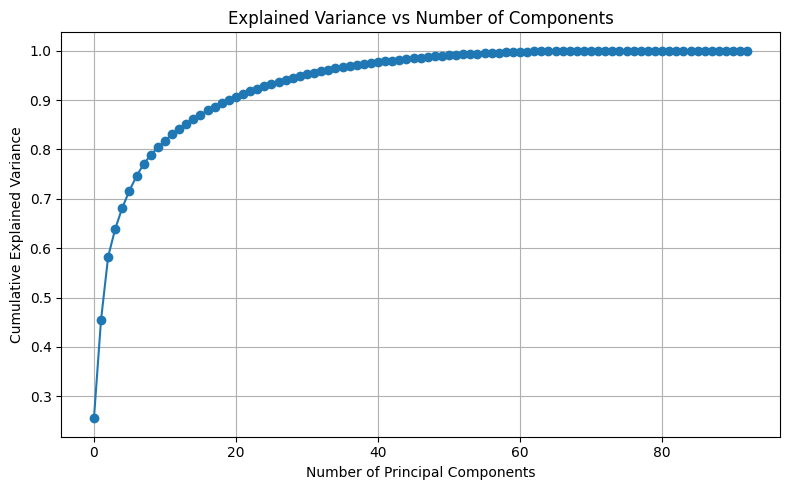


Number of components to explain 95% of variance: 31

Feature loadings on first few PCs:
                                     PC1       PC2       PC3       PC4  \
total_population                0.051975 -0.017158 -0.048486 -0.021783   
population_density              0.069328 -0.007639 -0.074269 -0.004881   
male_percent                   -0.063492 -0.027132  0.018728 -0.111076   
percent_inhouseholds            0.021025 -0.011088  0.150377 -0.180263   
percent_marriedhouseholds       0.068533 -0.134319  0.154443  0.144823   
...                                  ...       ...       ...       ...   
over25y_percent_graduatedegree  0.042586 -0.170723  0.029161  0.203833   
AREALAND                       -0.038536 -0.013412  0.047006  0.015777   
AREAWATR                        0.021230  0.002924  0.031579  0.043533   
AREALAND_SQMI                  -0.038580 -0.013262  0.047228  0.016158   
AREAWATR_SQMI                   0.021221  0.002920  0.031577  0.043464   

                      

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# === Load or assume df is already loaded ===
# Example placeholder:
# df = pd.read_csv('your_data.csv')

# === Separate features and target ===
X = features.drop(columns='Ride Count')
y = features['Ride Count']
feature_names = X.columns

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# === Run PCA with all components ===
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# === Plot cumulative explained variance ===
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs Number of Components')
plt.grid(True)
plt.tight_layout()
plt.show()

# === Print how many components explain 95% variance ===
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1
print(f"\nNumber of components to explain 95% of variance: {n_components_95}")

# === Feature Loadings (for interpretability) ===
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(len(X.columns))], index=feature_names)
print("\nFeature loadings on first few PCs:")
print(loadings.iloc[:, :5])  # Show loadings for first 5 PCs


# === Get absolute loadings ===
# Shape: [num_features, num_components]
loadings = np.abs(pca.components_.T)

# === Option 1: Use top N principal components (e.g. top 10 PCs) ===
top_n_pcs = 10
importance_scores = loadings[:, :top_n_pcs].sum(axis=1)  # Sum across top PCs

# === Option 2: Or weight by explained variance (better) ===
# explained_var = pca.explained_variance_ratio_[:top_n_pcs]
# importance_scores = (loadings[:, :top_n_pcs] * explained_var).sum(axis=1)

# === Get top 31 feature names ===
top_31_indices = np.argsort(importance_scores)[-31:][::-1]
top_31_features = feature_names[top_31_indices]

print("Top 31 features based on PCA:")
print(top_31_features.tolist())

In [25]:
correlation_matrix = np.corrcoef(features, rowvar=False)

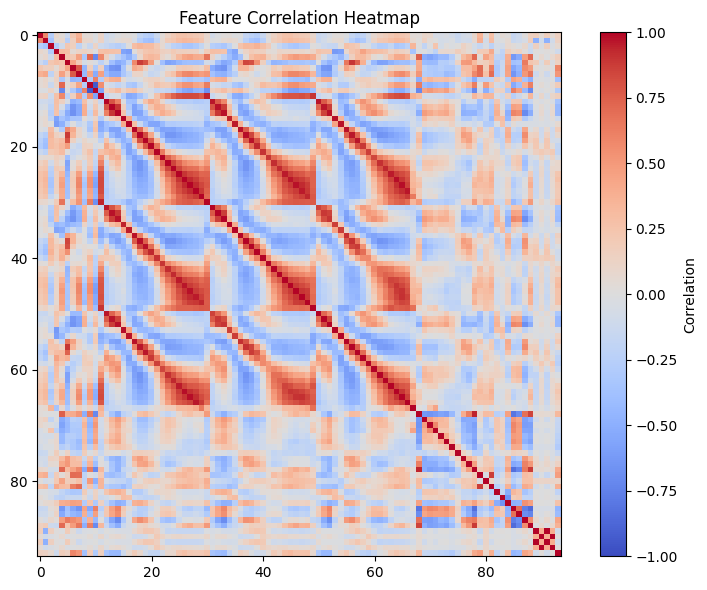

In [26]:
plt.figure(figsize=(8, 6))
plt.imshow(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar(label='Correlation')
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()

In [27]:
features = features[['AREAWATR', 'AREAWATR_SQMI', 'female_percent_over85', 'population_density', 'male_percent', 'percent_novehicles', 'AREALAND', 'AREALAND_SQMI', 'percent_inhouseholds', 'total_population', 'percent_lessthan1vehicle_perperson', 'female_percent_15to19', 'percent_15to19', 'percent_income_15to25k', 'percent_50to54', 'percent_income_75to100k', 'male_percent_50to54', 'female_percent_under5', 'male_percent_55to59', 'percent_under5', 'percent_solomale', 'male_percent_15to19', 'under25y_percent_somecollege', 'percent_55to59', 'percent_45to49', 'female_percent_25to29', 'percent_solofemale', 'percent_income_under10k', 'female_percent_20to24', 'percent_occupiedhousingunits', 'male_percent_under5', 'Ride Count']]

In [28]:
cleaned_normalized_csv_path = 'nyc_data_pca_cleaned_numeric_normalized.csv'
cleaned_data.to_csv(cleaned_normalized_csv_path, index=False)